In [1]:
  import os
  import PIL
  import numpy as np
  import shutil
  import pathlib
  import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [4]:
data_dir= tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [5]:
data_dir=pathlib.Path(data_dir)

In [6]:
image_count= len(list(data_dir.glob('*/*.jpg')))
print("Total no. of images",image_count)

Total no. of images 3670


In [7]:
batch_size=32
img_height=180
img_width=180

In [8]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [9]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names=train_ds.class_names

In [11]:
print("Class Names:",class_names)

Class Names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [12]:
train_ds=train_ds.cache().shuffle(1000)

val_ds=val_ds.cache()

In [13]:
num_classes=len(class_names)

In [14]:
num_classes

5

In [15]:
model=Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes)

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(
    optimizer='adam',

    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

    metrics=['accuracy']

)

In [17]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,965,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,063,909 (15.50 MB)

 Trainable params: 4,063,909 (15.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
print("Model Training....")

Model Training....


In [20]:
epochs=25

history=model.fit(
    train_ds,

    validation_data=val_ds,

    epochs=epochs
)

Epoch 1/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.5163 - loss: 1.1485 - val_accuracy: 0.5777 - val_loss: 1.0025
Epoch 2/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6113 - loss: 0.9704 - val_accuracy: 0.6213 - val_loss: 0.9653
Epoch 3/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6553 - loss: 0.8879 - val_accuracy: 0.6608 - val_loss: 0.8691
Epoch 4/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6831 - loss: 0.8164 - val_accuracy: 0.6921 - val_loss: 0.7972
Epoch 5/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7310 - loss: 0.7217 - val_accuracy: 0.6826 - val_loss: 0.7930
Epoch 6/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7943 - loss: 0.5787 - val_accuracy: 0.6975 - val_loss: 0.8028
Epoch 7/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8337 - loss: 0.4642 - val_accuracy: 0.6935 - val_loss: 0.7935
Epoch 8/25
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8698 - loss: 0.3628 - val_accuracy: 0.6907 - v

In [21]:
print("Training Complete!")

Training Complete!


In [22]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

In [23]:
acc

[0.5333787202835083,
 0.6110354065895081,
 0.654291570186615,
 0.6982288956642151,
 0.7278610467910767,
 0.7741825580596924,
 0.8228882551193237,
 0.8644413948059082,
 0.8841961622238159,
 0.9083787202835083,
 0.9291552901268005,
 0.9560626745223999,
 0.9577656388282776,
 0.971389651298523,
 0.9594686627388,
 0.9618528485298157,
 0.9802452325820923,
 0.984673023223877,
 0.9877384305000305,
 0.9764986634254456,
 0.9809264540672302,
 0.9812670350074768,
 0.9822888374328613,
 0.9860354065895081,
 0.9870572090148926]

In [24]:
val_acc

[0.5776566863059998,
 0.6212534308433533,
 0.6607629656791687,
 0.692098081111908,
 0.6825612783432007,
 0.6975476741790771,
 0.6934604644775391,
 0.6907356977462769,
 0.7029972672462463,
 0.7193460464477539,
 0.7152588367462158,
 0.7098092436790466,
 0.7125340700149536,
 0.6989100575447083,
 0.7043596506118774,
 0.6975476741790771,
 0.7016348838806152,
 0.7166212797164917,
 0.7166212797164917,
 0.7002725005149841,
 0.7057220935821533,
 0.6975476741790771,
 0.6852861046791077,
 0.696185290813446,
 0.7016348838806152]

In [25]:
loss=history.history['loss']
val_loss=history.history['val_loss']

In [26]:
loss

[1.11285400390625,
 0.9798704385757446,
 0.8816866874694824,
 0.7805739641189575,
 0.7254419326782227,
 0.5949414968490601,
 0.4719422161579132,
 0.3712352514266968,
 0.319690465927124,
 0.26238128542900085,
 0.20349854230880737,
 0.1457878202199936,
 0.13052043318748474,
 0.09331712871789932,
 0.12853838503360748,
 0.1142248660326004,
 0.06799934059381485,
 0.051639679819345474,
 0.041329432278871536,
 0.06616109609603882,
 0.05900264158844948,
 0.054654981940984726,
 0.06113388016819954,
 0.04667198285460472,
 0.046885956078767776]

In [27]:
val_loss

[1.0024937391281128,
 0.9653289318084717,
 0.8690716028213501,
 0.7971511483192444,
 0.7930154800415039,
 0.8028320670127869,
 0.7934955358505249,
 0.9074687957763672,
 0.8983544111251831,
 0.9897753596305847,
 1.0163966417312622,
 1.2655233144760132,
 1.2643307447433472,
 1.5052368640899658,
 1.3560739755630493,
 1.31203031539917,
 1.6686044931411743,
 1.556454062461853,
 1.7499866485595703,
 1.7168903350830078,
 1.7590572834014893,
 1.7922513484954834,
 1.8998340368270874,
 1.886845588684082,
 1.80144202709198]

In [28]:
epochs_range=range(epochs)

Text(0.5, 1.0, 'Training and Validation Accuracy')

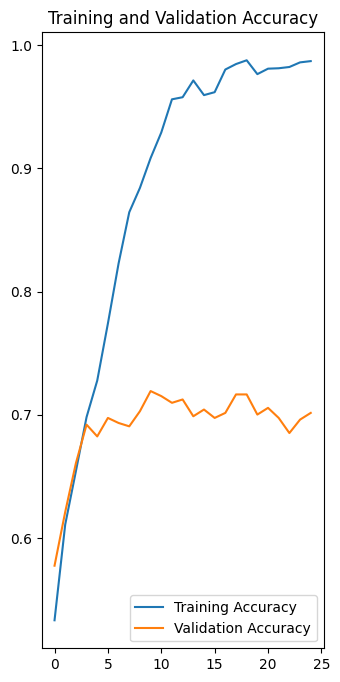

In [30]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)

plt.plot(epochs_range,acc,label="Training Accuracy")

plt.plot(epochs_range,val_acc,label="Validation Accuracy")

plt.legend(loc='lower right')

plt.title( 'Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

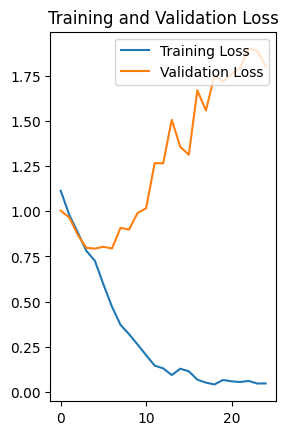

In [31]:
plt.subplot(1,2,2)

plt.plot(epochs_range,loss,label="Training Loss")

plt.plot(epochs_range,val_loss,label="Validation Loss")

plt.legend(loc='upper right')

plt.title( 'Training and Validation Loss')

In [34]:
save_model(model,'flower_model_trained.hdf5')
print("model Saved")

model Saved
